# Calculate correlation between change in population and change in Energy Consumption

## Get "Change in Population by Country" over 10 years

### Cleaning data for analysis (melt)

In [479]:
import pandas as pd 

#import UN population dataset

df_pop = pd.read_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/population/import_worldpop_un.csv')
df_pop = df_pop.drop(columns = ['Index', 'Region', 'Variant', 'Subregion', 'Country code', 'Type', 'Parent code'])
df_pop.sample()

,Geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,12 412,13 299,14 486,15 817,17 076,18 111,18 853,19 357,19 738,...,30 117,31 161,32 270,33 371,34 414,35 383,36 296,37 172,38 042,38 928


In [480]:
df_melt = pd.melt(df_pop, id_vars=['Geo'], var_name='Year')
df_melt.dropna(inplace=True)

In [481]:
df_melt['pop'] = df_melt['value'].str.replace(' ', '')
df_melt['pop'] = df_melt['pop'].astype(int)
df_melt['Year'] = df_melt['Year'].astype(int)
df_melt['pop'] = df_melt['pop']*1000
df_melt

,Geo,Year,value,pop
0,Afghanistan,1990,12 412,12412000
1,Albania,1990,3 286,3286000
2,Algeria,1990,25 759,25759000
3,American Samoa,1990,47,47000
4,Andorra,1990,55,55000
...,...,...,...,...
7311,Venezuela (Bolivar. Rep.),2020,28 436,28436000
7312,Wallis and Futuna Is.,2020,11,11000
7313,Samoa,2020,198,198000
7314,Yemen,2020,29 826,29826000


### Change in overall world population

In [482]:
#sum population of all countries over time

df_filt = df_melt
grp_year = df_filt.groupby(['Year'])
tot_yr = grp_year['pop'].agg(['sum'])
tot_yr.sort_values(by='Year', ascending=True, inplace=True)
tot_yr.rename(columns={'sum':'world population'}, inplace=True)

AxesSubplot(0.125,0.125;0.775x0.755)


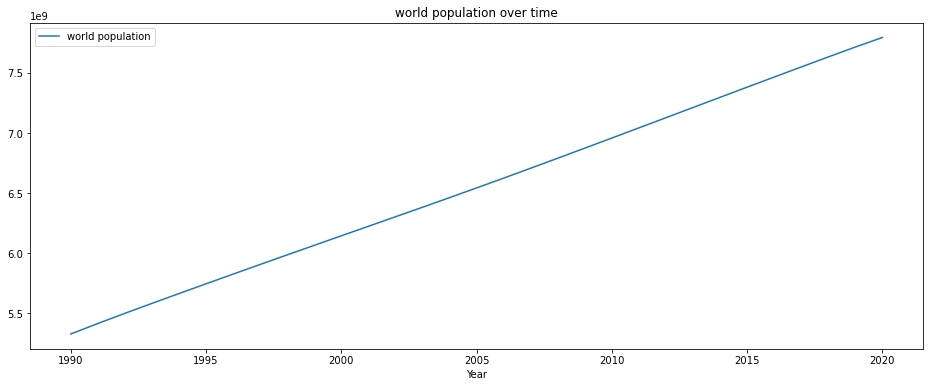

In [483]:
import matplotlib.pyplot as plt

#viz of worldwide population

print(tot_yr.plot(figsize=(16,6), title='world population over time'))

### Change sample countries populations


AxesSubplot(0.125,0.125;0.775x0.755)


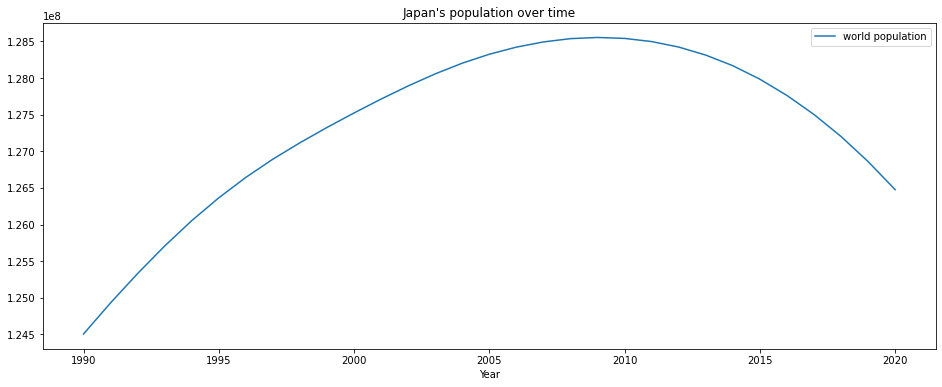

In [484]:

#sum population of all countries over time
df_filt = df_melt[df_melt['Geo'] == 'Japan']
grp_year = df_filt.groupby(['Year'])
tot_yr = grp_year['pop'].agg(['sum'])
tot_yr.sort_values(by='Year', ascending=True, inplace=True)
tot_yr.rename(columns={'sum':'world population'}, inplace=True)

tot_yr.head()
import matplotlib.pyplot as plt

#it looks different with each country I swear

print(tot_yr.plot(figsize=(16,6), title="Japan's population over time"))

AxesSubplot(0.125,0.125;0.775x0.755)


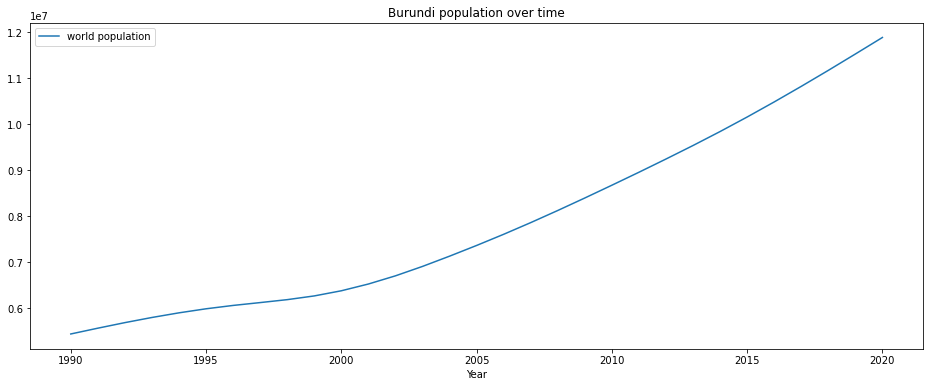

In [485]:

#sum population of all countries over time
df_filt = df_melt[df_melt['Geo'].str.contains('Burundi')]
grp_year = df_filt.groupby(['Year'])
tot_yr = grp_year['pop'].agg(['sum'])
tot_yr.sort_values(by='Year', ascending=True, inplace=True)
tot_yr.rename(columns={'sum':'world population'}, inplace=True)

tot_yr.head()
import matplotlib.pyplot as plt

#it looks different with each country I swear

print(tot_yr.plot(figsize=(16,6), title="Burundi population over time"))

### Group population by country - 2008 and 2010

In [486]:
#copy dataset and filter by years
df_pop = df_melt

df_pop_2018 = df_pop[df_pop['Year'] == 2018]
df_pop_2008 = df_pop[df_pop['Year'] == 2008]

df_pop_2018.head()

,Geo,Year,value,pop
6608,Afghanistan,2018,37 172,37172000
6609,Albania,2018,2 883,2883000
6610,Algeria,2018,42 228,42228000
6611,American Samoa,2018,55,55000
6612,Andorra,2018,77,77000


In [487]:
#combine datasets to get a percent change over 10 years

df_pop_change = pd.merge(df_pop_2008,  
                     df_pop_2018,  
                     on ='Geo', 
                     how ='left') 
                     
df_pop_change.rename(columns = {'2018_x':'2018', '2018_y':'2008'}, inplace=True)
df_pop_change.drop(columns = ['Year_y', 'Year_x'], inplace=True)
df_pop_change = df_pop_change[['Geo', 'pop_x', 'pop_y']]
df_pop_change.rename(columns = {'pop_x' : '2008', 'pop_y' : '2018'}, inplace=True)


df_pop_change['pop pc'] = (df_pop_change['2018'] - df_pop_change['2008']) / df_pop_change['2008']

df_pop_change


,Geo,2008,2018,pop pc
0,Afghanistan,27722000,37172000,0.340884
1,Albania,3003000,2883000,-0.039960
2,Algeria,34731000,42228000,0.215859
3,American Samoa,57000,55000,-0.035088
4,Andorra,84000,77000,-0.083333
...,...,...,...,...
231,Venezuela (Bolivar. Rep.),27636000,28887000,0.045267
232,Wallis and Futuna Is.,14000,12000,-0.142857
233,Samoa,183000,196000,0.071038
234,Yemen,21892000,28499000,0.301800


## Get "Change in Energy Consumption (NOT production) by Country" over 10 years

In [488]:
#combining all datasets using map function

import glob
import pandas as pd 

#map renewables

df_renew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_renewable/*.csv')))
df_renew.rename(columns={'Country or Area':'Geo'}, inplace=True)

#map nonrenewables

df_nonrenew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_nonrenewable/*.csv')))
df_nonrenew.rename(columns={'Country or Area':'Geo'}, inplace=True)

df = pd.concat([df_renew, df_nonrenew])

#split commodity and transaction into two columns
#defining column to split and which delimiter
ct = df['Commodity - Transaction'].str.split('-')

#assigning new columns
df['Commodity'] = ct.str.get(0)
df['Transaction'] = ct.str.get(1)

#lowercase and remove trailing and leading spaces
df['Commodity'] = df['Commodity'].str.lower()
df['Commodity'] = df['Commodity'].str.strip()

df['Transaction'] = df['Transaction'].str.lower()
df['Transaction'] = df['Transaction'].str.strip()

df = df[df['Transaction'] == 'final consumption']
# this filters out some renewables, but you can swith this to "production" to get all countries' production in TJ.  Correlations are much different at the bottom.

#df.shape

In [489]:
import pandas as pd 
unit_conv = pd.read_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/renewable_energy_units_conv_2.csv')

df_merge = pd.merge(df,  
                     unit_conv,  
                     on ='Commodity', 
                     how ='left') 

df_merge['TJ'] = df_merge['Quantity'] * df_merge['Conv_mt_to_tj']
df_merge.sample(2)

,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction,Description,Units,Conv_mt_to_tj,r_type,TJ
83097,France,White spirit and special boiling point industr...,2006.0,"Metric tons, thousand",110.000,NaN,white spirit and special boiling point industr...,final consumption,NaN,"Metric tons, thousand",40.2,nonrenewable,4422.000
41102,Mauritius,Gas Oil/ Diesel Oil - Final consumption,2018.0,"Metric tons, thousand",214.901,NaN,gas oil/ diesel oil,final consumption,NaN,"Metric tons, thousand",43.0,nonrenewable,9240.743


In [490]:
lt_2008 = df_merge[df_merge['Year'] == 2008]
tot_grp_country_2008 = lt_2008.groupby(['Geo'])
df_tot_country_en_2008 = tot_grp_country_2008['TJ'].agg(['sum'])
df_tot_country_en_2008.rename(columns = {'sum' : '2008'}, inplace=True)


In [491]:
lt_2018 = df_merge[df_merge['Year'] == 2018]
tot_grp_country_2018 = lt_2018.groupby(['Geo'])
df_tot_country_en_2018 = tot_grp_country_2018['TJ'].agg(['sum'])
df_tot_country_en_2018.rename(columns = {'sum' : '2018'}, inplace=True)

df_tot_country_en_2018.head()

,2018
Geo,
Afghanistan,1.121870e+05
Albania,6.927933e+04
Algeria,1.557014e+06
American Samoa,8.040000e+00
Andorra,7.229298e+03


In [492]:
#combine datasets to get a percent change over 10 years

energy_perc_change = pd.concat([df_tot_country_en_2008, df_tot_country_en_2018], axis='columns', sort=False)
energy_perc_change['energy pc'] = (energy_perc_change['2018'] - energy_perc_change['2008']) / energy_perc_change['2008']
energy_perc_change['Geo'] = energy_perc_change.index

energy_perc_change.head()

,2008,2018,energy pc,Geo
Afghanistan,64304.637980,1.121870e+05,0.744618,Afghanistan
Albania,63828.761200,6.927933e+04,0.085394,Albania
Algeria,884169.266777,1.557014e+06,0.760991,Algeria
American Samoa,16.080000,8.040000e+00,-0.500000,American Samoa
Andorra,7837.623500,7.229298e+03,-0.077616,Andorra


## Merging Energy and Population Datasets

In [493]:
pop_pc = df_pop_change[['Geo', 'pop pc']]
en_pc = energy_perc_change[['Geo', 'energy pc']]

df_merge = pd.merge(pop_pc,  
                     en_pc,  
                     on ='Geo', 
                     how ='left') 
df_merge.dropna(inplace=True)
df_merge.head()

,Geo,pop pc,energy pc
0,Afghanistan,0.340884,0.744618
1,Albania,-0.039960,0.085394
2,Algeria,0.215859,0.760991
3,American Samoa,-0.035088,-0.500000
4,Andorra,-0.083333,-0.077616


In [494]:
corr = df_merge.drop(['Geo'],axis=1).corr()

corr

,pop pc,energy pc
pop pc,1.000000,0.315549
energy pc,0.315549,1.000000


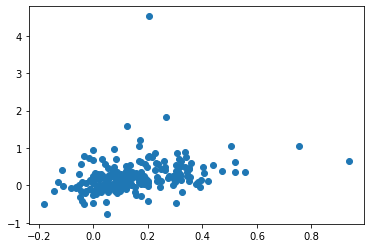

In [495]:
#Energy output has a slight negative correlation to population growth

import matplotlib.pyplot as plt

x = df_merge['pop pc']
y = df_merge['energy pc']

plt.scatter(x, y)

In [496]:
# there are some energy extremes that increased their energy production over 150%

extremes = df_merge[df_merge['energy pc'] > 1]
extremes.count()

Geo          7
pop pc       7
energy pc    7
dtype: int64

In [497]:
#plot the non-extremes

non_extremes = df_merge[df_merge['energy pc'] < 1]
non_extremes.count()

Geo          204
pop pc       204
energy pc    204
dtype: int64

In [498]:

corr = extremes.drop(['Geo'], axis=1).corr()
corr



,pop pc,energy pc
pop pc,1.000000,-0.312324
energy pc,-0.312324,1.000000


In [499]:
corr = non_extremes.drop(['Geo'],axis=1).corr()

corr

,pop pc,energy pc
pop pc,1.000000,0.378497
energy pc,0.378497,1.000000


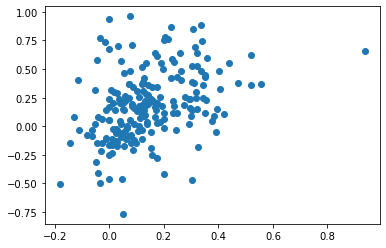

In [500]:
import matplotlib.pyplot as plt

x = non_extremes['pop pc']
y = non_extremes['energy pc']

plt.scatter(x, y)

## Population Growth by Region

In [501]:
df_region = pd.read_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/population/import_worldpop_un.csv')
df_region = df_region.drop(columns = ['Index', 'Variant', 'Subregion', 'Country code', 'Type', 'Parent code'])
df_region_melt = pd.melt(df_region, id_vars=['Region', 'Geo'], var_name = 'Year')
df_region_melt.dropna(inplace=True)
df_region_melt['value'] = (df_region_melt['value'].str.replace(' ', '')).astype(int)*1000
df_region_melt.rename(columns={'value':'pop'}, inplace=True)
# df_melt['pop'] = df_melt['pop'].astype(int)
df_region_melt


,Region,Geo,Year,pop
0,CENTRAL AND SOUTHERN ASIA,Afghanistan,1990,12412000
1,EUROPE,Albania,1990,3286000
2,NORTHERN AFRICA,Algeria,1990,25759000
3,OCEANIA,American Samoa,1990,47000
4,EUROPE,Andorra,1990,55000
...,...,...,...,...
7311,LATIN AMERICA AND THE CARIBBEAN,Venezuela (Bolivar. Rep.),2020,28436000
7312,OCEANIA,Wallis and Futuna Is.,2020,11000
7313,OCEANIA,Samoa,2020,198000
7314,WESTERN ASIA,Yemen,2020,29826000


In [502]:
region_2018 = df_region_melt[df_region_melt['Year'] == "2018"]
region_2008 = df_region_melt[df_region_melt['Year'] == "2008"]
region_2008.head()

,Region,Geo,Year,pop
4248,CENTRAL AND SOUTHERN ASIA,Afghanistan,2008,27722000
4249,EUROPE,Albania,2008,3003000
4250,NORTHERN AFRICA,Algeria,2008,34731000
4251,OCEANIA,American Samoa,2008,57000
4252,EUROPE,Andorra,2008,84000


In [503]:
df_region_merge = pd.merge(region_2008,  
                     region_2018,  
                     on =['Geo', 'Region'], 
                     how ='left') 
df_region_merge.dropna(inplace=True)
df_region_merge.drop(columns=['Year_x', 'Year_y'],inplace=True)
df_region_merge.rename(columns = {'pop_x': '2008', 'pop_y':'2018'}, inplace=True)
df_region_merge['p_change'] = (df_region_merge['2018'] - df_region_merge['2008']) / df_region_merge['2008']
df_region_merge.head()

,Region,Geo,2008,2018,p_change
0,CENTRAL AND SOUTHERN ASIA,Afghanistan,27722000,37172000,0.340884
1,EUROPE,Albania,3003000,2883000,-0.039960
2,NORTHERN AFRICA,Algeria,34731000,42228000,0.215859
3,OCEANIA,American Samoa,57000,55000,-0.035088
4,EUROPE,Andorra,84000,77000,-0.083333


In [504]:
df_region_box = df_region_merge[['Region', 'Geo', 'p_change']]
df_region_box

,Region,Geo,p_change
0,CENTRAL AND SOUTHERN ASIA,Afghanistan,0.340884
1,EUROPE,Albania,-0.039960
2,NORTHERN AFRICA,Algeria,0.215859
3,OCEANIA,American Samoa,-0.035088
4,EUROPE,Andorra,-0.083333
...,...,...,...
231,LATIN AMERICA AND THE CARIBBEAN,Venezuela (Bolivar. Rep.),0.045267
232,OCEANIA,Wallis and Futuna Is.,-0.142857
233,OCEANIA,Samoa,0.071038
234,WESTERN ASIA,Yemen,0.301800


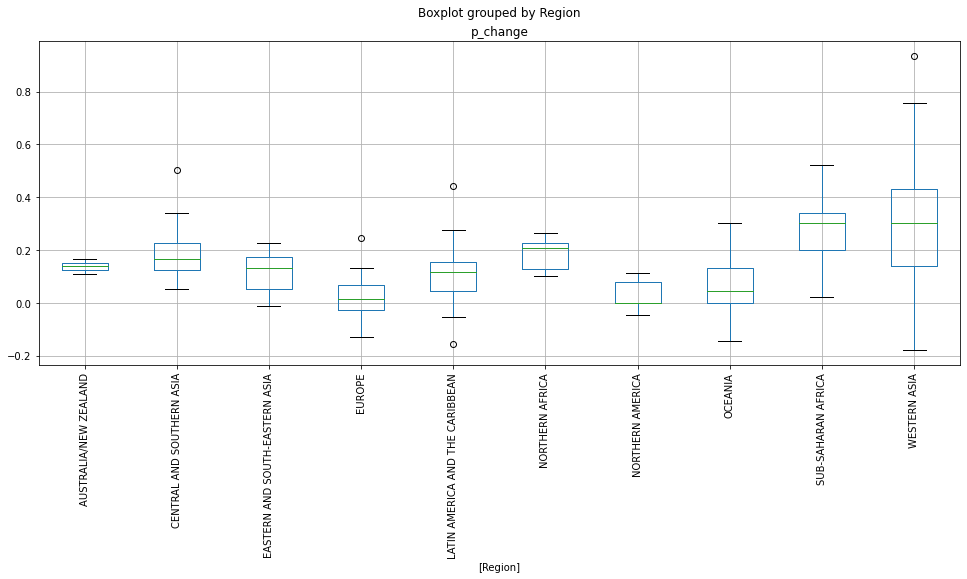

In [505]:


boxplot = df_region_box.boxplot(by= ['Region'], figsize=(16,6), rot=90)

In [513]:
ext = df_region_box[df_region_box['p_change'] > .5]
ext.head(20)

,Region,Geo,p_change
59,SUB-SAHARAN AFRICA,Equatorial Guinea,0.520325
105,WESTERN ASIA,Jordan,0.519982
109,WESTERN ASIA,Kuwait,0.557605
124,CENTRAL AND SOUTHERN ASIA,Maldives,0.504373
138,WESTERN ASIA,Oman,0.755362
170,WESTERN ASIA,Qatar,0.935978
